# Self-Supervised Monocular Depth Estimation

In [14]:
from dataloader import KittiDataset
from transformation import ToResizeImage, ToRandomFlip, ToTensor, AugumentImagePair
from model import Model

import torch
from torch.utils.data import DataLoader

import os
import numpy as np
import random
import skimage.transform
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as tF

## Data Loading

In [3]:
train_path = os.path.join(os.getcwd(), "data/train")
test_path = os.path.join(os.getcwd(), 'data/test')

In [4]:
train_transform = transforms.Compose([
    ToResizeImage(),
    ToRandomFlip(),
    ToTensor(),
    AugumentImagePair(),
])
test_transform = transforms.Compose([
    ToResizeImage(),
    ToTensor(),
])

In [5]:
train_set = KittiDataset(train_path, 'train', transform = train_transform)
test_set = KittiDataset(test_path, 'test', transform = test_transform)

train_loader = DataLoader(train_set, batch_size = 5, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 3, shuffle = False)

# for batch_step, batch_sample in enumerate(train_loader):
#     print(batch_step, batch_sample['left_image'].shape)
#     break  

## Implement CNN using PyTorch

In [6]:
model = Model(device='cpu', 
              epochs=1, 
              save_per_epoch='none', 
              img_height=256, 
              img_width=512, 
              model_path='output_model', 
              disp_path='output_disp')

In [7]:
model.train(train_loader)

/usr/local/lib/python3.9/site-packages/torch/nn/functional.py:3828: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


--- Epoch 0	Average Loss: 5.32	Time: 0:05:48.319199


[5.320699127096879]

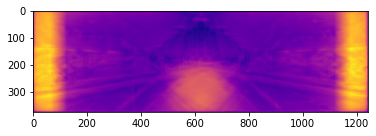

In [15]:
disp = np.load('output_disp/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

In [7]:
model.test(test_loader)